## Week2. Optimization Problems & Rydberg Atom Arrays - Task 2

------

We demonstrate the solution of given UD-MIS problem, obtained by
the simulation of quantum annealing with Rydberg machine.

Starting from the imports :

In [1]:
from collections import Counter

from Week2_Rydberg_Atoms.utils import int_to_bin, int_to_bin_str, sanity_check
from draw_graph import draw_graph, draw_multi_graph, draw_distributions
from julia_run_quantum_annealing import run_annealing, measure, ex_graph, ex_edges, ex_dt

/home/gwonhaklee/workspace/CohortProject_2021/venv/lib/python3.8/site-packages/julia/core.py:687: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


Drawing the example graph, the radius of the circle is 0.5.

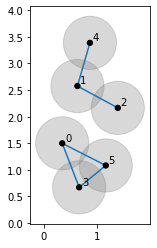

In [2]:
draw_graph(ex_graph, 0.5)

Get the quantum state and measure it for 10,000 times. We order the bit-strings by the number of occurrence.

In [3]:
psi = run_annealing(ex_graph, ex_edges, ex_dt)
samples = [s for s in measure(psi, nshots=10000)]
occurrence = Counter(samples)
max_occ = sorted([k for k in occurrence], key=lambda k: occurrence[k], reverse=True)
print(occurrence)
print(max_occ)

Counter({52: 2849, 21: 2848, 28: 2811, 60: 288, 53: 288, 29: 287, 24: 90, 12: 86, 48: 85, 17: 79, 36: 74, 5: 70, 20: 59, 10: 15, 3: 11, 25: 10, 34: 8, 13: 8, 49: 7, 44: 7, 37: 6, 56: 5, 35: 2, 4: 2, 8: 2, 32: 2, 16: 1})
[52, 21, 28, 60, 53, 29, 24, 12, 48, 17, 36, 5, 20, 10, 3, 25, 34, 13, 49, 44, 37, 56, 35, 4, 8, 32, 16]


We plot the measured bitstrings by the highlights in the graph. Bitstrings observed less than 10 times are ignored.

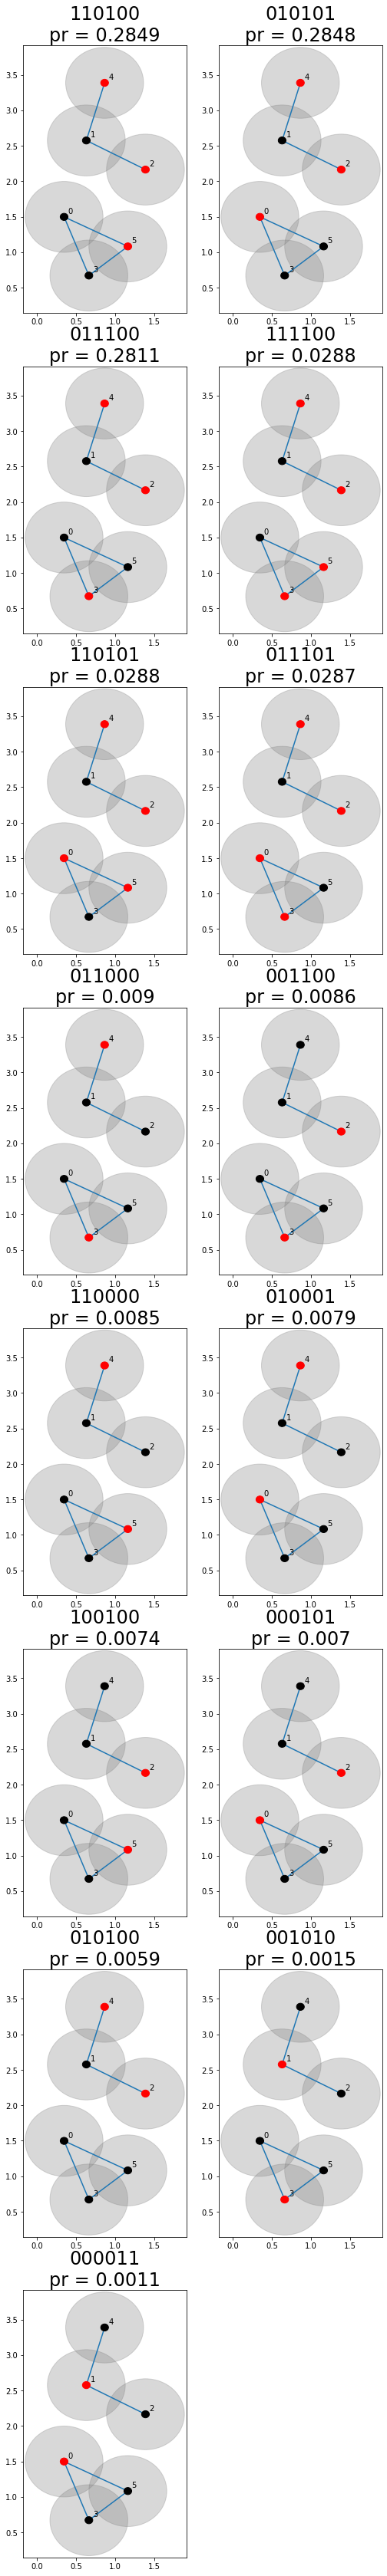

In [4]:
ans = [int_to_bin(m, len(ex_graph)) for m in max_occ if occurrence[m] > 10]
titles = [f"{int_to_bin_str(m, len(ex_graph))}\npr = {occurrence[m]/10000}" for m in max_occ  if occurrence[m] > 10]
draw_multi_graph(ex_graph, 0.5, answer_list=ans, titles=titles)

We see that the first three plots have 3 vertices for each, and no violations. However, the 4th one has a violation,
so it is not an independent set.

Knowing that the size of maximal independent set is 3,
We calculate the probabilities to find the optimal, violated, and sub-optimal solutions.


In [5]:
num_violation = 0
num_suboptimal = 0
num_optimal = 0
sanity_list = list()
plot_list = list()
for m in max_occ:
    ans = int_to_bin(m, len(ex_graph))
    ans_str = int_to_bin_str(m, len(ex_graph))
    plot_list.append((ans_str, occurrence[m]))
    v, n = sanity_check(ex_graph, radius=0.5, answer=ans)
    if v > 0:
        num_violation += occurrence[m]
        sanity_list.append(False)
    elif n < 3:
        num_suboptimal += occurrence[m]
        sanity_list.append(False)
    elif n == 3:
        num_optimal += occurrence[m]
        sanity_list.append(True)
    else:
        raise RuntimeError
print(f"probability to find optimal answers    : {num_optimal/10000}")
print(f"probability to find invalid answers    : {num_violation/10000}")
print(f"probability to find suboptimal answers : {num_suboptimal/10000}")

probability to find optimal answers    : 0.8508
probability to find invalid answers    : 0.0908
probability to find suboptimal answers : 0.0584


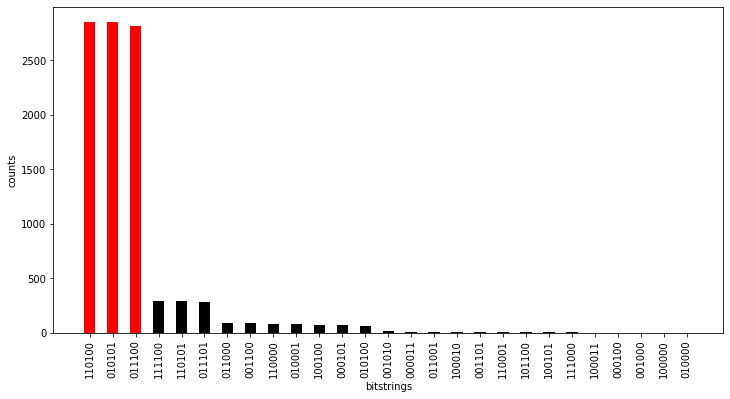

In [6]:
draw_distributions(plot_list, sanity_list)